In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
import string
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('/Users/skylark/Desktop/Misc/dataset/train.csv')

In [3]:
train

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1
...,...,...,...,...,...,...
3230,1.245745e+18,"To all my sisters ,my sisters -in -law and als...",en,0,TheBookTweeters,0
3231,1.244368e+18,"Happy Mother’s Day to all the Mums, Step Mums,...",en,0,MPWTW,1
3232,1.245675e+18,Happy Mothers Day to the craziest woman I know...,en,0,localcreativity,0
3233,1.243976e+18,Happy Mother's Day to my amazing wife! We both...,en,0,LoveluK77651882,0


In [4]:
test = pd.read_csv('/Users/skylark/Desktop/Misc/dataset/test.csv')
test

,id,original_text,lang,retweet_count,original_author
0,1.246628e+18,"3. Yeah, I once cooked potatoes when I was 3 y...",en,0,LToddWood
1,1.245898e+18,"Happy Mother's Day to all the mums, step-mums,...",en,0,iiarushii
2,1.244717e+18,"I love the people from the UK, however, when I...",en,0,andreaanderegg
3,1.245730e+18,Happy 81st Birthday Happy Mother’s Day to my m...,en,1,TheBookTweeters
4,1.244636e+18,Happy Mothers day to all those wonderful mothe...,en,0,andreaanderegg
...,...,...,...,...,...
1382,1.245219e+18,Happy Mother’s Day you crazy bitch I’m sorry c...,en,0,MarlosFinds
1383,1.245882e+18,"Mum can't get to the bingo, so we brought the ...",-0.8393813523,en,1
1384,1.246461e+18,Despite all this bullshit today has been one o...,en,0,LToddWood
1385,1.246245e+18,Happy Mothers Day Firstly to my Queen daniele_...,en,0,LToddWood


In [19]:
pat = re.compile(r'[\w]+\s')

In [20]:
''.join(pat.findall(train.original_text[0])).lower()

'happy mothersday to all you amazing mothers out i know s hard not being able to see your mothers today but s on all of us to do what we can to protect the most vulnerable members of our beatcoronavirus '

In [15]:
train['filtered '] = train.original_text.apply(lambda x: ''.join(pat.findall(x)).lower())

In [16]:
train

,id,original_text,lang,retweet_count,original_author,sentiment_class,filtered
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0,happy mothersday to all you amazing mothers ou...
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0,happy mothers day mum m sorry i t be there to ...
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1,happy mothers day to all this doing a mothers ...
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0,happy mothers day to this beautiful royalty so...
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1,remembering the 3 most amazing ladies who made...
...,...,...,...,...,...,...,...
3230,1.245745e+18,"To all my sisters ,my sisters -in -law and als...",en,0,TheBookTweeters,0,to all my sisters my sisters in law and also m...
3231,1.244368e+18,"Happy Mother’s Day to all the Mums, Step Mums,...",en,0,MPWTW,1,happy s day to all the step aunties you are al...
3232,1.245675e+18,Happy Mothers Day to the craziest woman I know...,en,0,localcreativity,0,happy mothers day to the craziest woman i than...
3233,1.243976e+18,Happy Mother's Day to my amazing wife! We both...,en,0,LoveluK77651882,0,happy s day to my amazing we both love you lik...


In [21]:
test['filtered '] = test.original_text.apply(lambda x: ''.join(pat.findall(x)).lower())

In [26]:
test.columns

Index(['id', 'original_text', 'lang', 'retweet_count', 'original_author',
       'filtered '],
      dtype='object')

In [23]:
pat1 = re.compile(r'\D')

In [28]:
''.join(pat1.findall(test['filtered '][0]))

'i once cooked potatoes when i was  years and by that i mean i threw a bag of spuds into the happy mothers day i made that time i thought i was cool by drawing the naked lady dachshund on the overhead projector in psychology '

In [29]:
train['filtered'] = train.original_text.apply(lambda x: ''.join(pat1.findall(x)).lower())

In [30]:
test['filtered'] = test.original_text.apply(lambda x: ''.join(pat1.findall(x)).lower())

### One - hot encoding and Word Embedding

In [51]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [52]:
max_features = 10000
maxlen = 300

In [53]:
toknzr = Tokenizer(num_words=max_features)

In [54]:
toknzr.fit_on_texts(train.filtered)

In [57]:
sequences = toknzr.texts_to_sequences(train.filtered)

In [59]:
train_data = pad_sequences(sequences, maxlen=maxlen)

In [61]:
toknzr1 = Tokenizer(num_words=max_features)

In [62]:
toknzr1.fit_on_texts(test.filtered)
sequences1 = toknzr1.texts_to_sequences(test.filtered)

In [63]:
test_data = pad_sequences(sequences1, maxlen=maxlen)

In [67]:
test_data.shape

(1387, 300)

In [66]:
train_data.shape

(3235, 300)

In [68]:
train_label = train.sentiment_class

In [69]:
train_label.shape

(3235,)

In [72]:
from sklearn.model_selection import train_test_split

In [97]:
train_x, test_x, train_y, test_y = train_test_split(train_data, train_label, test_size=0.3, random_state=100)

### SimpleRNN

In [86]:
from keras import models, layers, optimizers

In [125]:
model_rnn = models.Sequential()

In [115]:
model_rnn.add(layers.Embedding(max_features, 128, input_length=maxlen))
model_rnn.add(layers.SimpleRNN(32, dropout=0.2, recurrent_dropout=0.2))
model_rnn.add(layers.Dense(3, activation='softmax'))
model_rnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 300, 128)          1280000   
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                5152      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 1,285,251
Trainable params: 1,285,251
Non-trainable params: 0
_________________________________________________________________


In [116]:
model_rnn.compile(optimizer=optimizers.RMSprop(lr=2e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [117]:
history_rnn = model_rnn.fit(train_x, train_y, epochs=10, batch_size=128, validation_split=0.2)

Train on 1811 samples, validate on 453 samples
Epoch 1/10
1811/1811 [==============================] - 5s 3ms/step - loss: 1.1578 - acc: 0.3429 - val_loss: 1.0767 - val_acc: 0.4194
Epoch 2/10
1811/1811 [==============================] - 5s 3ms/step - loss: 1.1214 - acc: 0.3650 - val_loss: 1.0698 - val_acc: 0.4327
Epoch 3/10
1811/1811 [==============================] - 4s 2ms/step - loss: 1.1203 - acc: 0.3782 - val_loss: 1.0615 - val_acc: 0.4459
Epoch 4/10
1811/1811 [==============================] - 5s 3ms/step - loss: 1.1163 - acc: 0.3882 - val_loss: 1.0549 - val_acc: 0.4680
Epoch 5/10
1811/1811 [==============================] - 4s 2ms/step - loss: 1.1086 - acc: 0.3838 - val_loss: 1.0486 - val_acc: 0.4746
Epoch 6/10
1811/1811 [==============================] - 4s 2ms/step - loss: 1.0937 - acc: 0.4180 - val_loss: 1.0433 - val_acc: 0.4857
Epoch 7/10
1811/1811 [==============================] - 4s 2ms/step - loss: 1.0810 - acc: 0.4263 - val_loss: 1.0386 - val_acc: 0.4945
Epoch 8/10
1811

In [118]:
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']

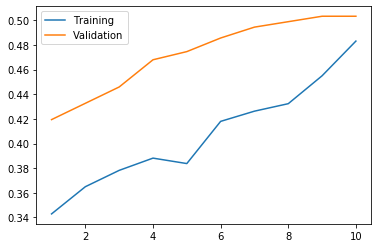

In [119]:
plt.plot(range(1, len(acc)+1), acc, label='Training')
plt.plot(range(1, len(acc)+1), val_acc, label='Validation')
plt.legend()
plt.show()

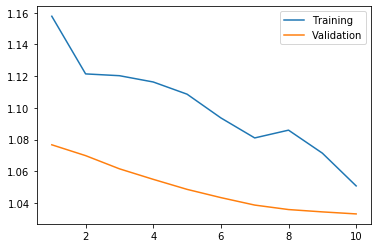

In [120]:
plt.plot(range(1, len(acc)+1), loss, label='Training')
plt.plot(range(1, len(acc)+1), val_loss, label='Validation')
plt.legend()
plt.show()

In [121]:
model_rnn.evaluate(test_x, test_y)

971/971 [==============================] - 1s 1ms/step


[1.0508447469324333, 0.4850669503211975]

### LSTM

In [130]:
model_lstm = models.Sequential()

In [131]:
model_lstm.add(layers.Embedding(max_features, 128, input_length=maxlen))
model_lstm.add(layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model_lstm.add(layers.Flatten())
model_lstm.add(layers.Dense(3, activation='softmax'))
model_lstm.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 300, 128)          1280000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 300, 32)           20608     
_________________________________________________________________
flatten_1 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 28803     
Total params: 1,329,411
Trainable params: 1,329,411
Non-trainable params: 0
_________________________________________________________________


In [132]:
model_lstm.compile(optimizer=optimizers.RMSprop(lr=2e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [133]:
history_lstm = model_lstm.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.2)

Train on 1811 samples, validate on 453 samples
Epoch 1/10
1811/1811 [==============================] - 24s 13ms/step - loss: 1.0256 - acc: 0.5251 - val_loss: 1.0361 - val_acc: 0.5077
Epoch 2/10
1811/1811 [==============================] - 23s 13ms/step - loss: 1.0165 - acc: 0.5329 - val_loss: 1.0352 - val_acc: 0.5077
Epoch 3/10
1811/1811 [==============================] - 23s 13ms/step - loss: 1.0161 - acc: 0.5329 - val_loss: 1.0355 - val_acc: 0.5077
Epoch 4/10
1811/1811 [==============================] - 21s 12ms/step - loss: 1.0080 - acc: 0.5329 - val_loss: 1.0368 - val_acc: 0.5077
Epoch 5/10
1811/1811 [==============================] - 21s 12ms/step - loss: 1.0011 - acc: 0.5329 - val_loss: 1.0420 - val_acc: 0.5077
Epoch 6/10
1811/1811 [==============================] - 31s 17ms/step - loss: 0.9842 - acc: 0.5334 - val_loss: 1.0407 - val_acc: 0.5077
Epoch 7/10
1811/1811 [==============================] - 20s 11ms/step - loss: 0.9620 - acc: 0.5367 - val_loss: 1.0426 - val_acc: 0.4989
E

In [134]:
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']

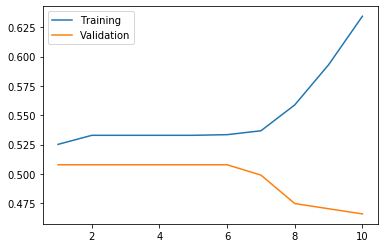

In [135]:
plt.plot(range(1, len(acc)+1), acc, label='Training')
plt.plot(range(1, len(acc)+1), val_acc, label='Validation')
plt.legend()
plt.show()

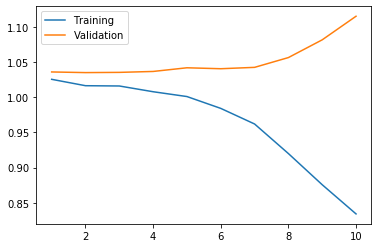

In [136]:
plt.plot(range(1, len(acc)+1), loss, label='Training')
plt.plot(range(1, len(acc)+1), val_loss, label='Validation')
plt.legend()
plt.show()

In [137]:
model_lstm.evaluate(test_x, test_y)

971/971 [==============================] - 2s 2ms/step


[1.0835406960714244, 0.49536558985710144]

### Reverse

In [142]:
x_rev = [x[::-1] for x in sequences]

In [148]:
x_rev = sequence.pad_sequences(x_rev, maxlen=maxlen)

In [150]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(x_rev, train_label, test_size=0.3, random_state=100)

In [151]:
model_rev = models.Sequential()

In [153]:
model_rev.add(layers.Embedding(max_features, 128, input_length=maxlen))
model_rev.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2))
model_rev.add(layers.Dense(3, activation='softmax'))
model_rev.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 300, 128)          1280000   
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                15456     
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 99        
Total params: 1,295,555
Trainable params: 1,295,555
Non-trainable params: 0
_________________________________________________________________


In [154]:
model_rev.compile(optimizer=optimizers.RMSprop(lr=2e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [155]:
history_rev = model_rev.fit(train_x1, train_y1, epochs = 10, batch_size=32, validation_split=0.2)

Train on 1811 samples, validate on 453 samples
Epoch 1/10
1811/1811 [==============================] - 30s 17ms/step - loss: 1.0735 - acc: 0.5019 - val_loss: 1.0645 - val_acc: 0.5077
Epoch 2/10
1811/1811 [==============================] - 30s 16ms/step - loss: 1.0319 - acc: 0.5329 - val_loss: 1.0465 - val_acc: 0.5077
Epoch 3/10
1811/1811 [==============================] - 27s 15ms/step - loss: 1.0156 - acc: 0.5329 - val_loss: 1.0417 - val_acc: 0.5077
Epoch 4/10
1811/1811 [==============================] - 26s 15ms/step - loss: 1.0085 - acc: 0.5329 - val_loss: 1.0405 - val_acc: 0.5077
Epoch 5/10
1811/1811 [==============================] - 26s 15ms/step - loss: 1.0066 - acc: 0.5329 - val_loss: 1.0402 - val_acc: 0.5077
Epoch 6/10
1811/1811 [==============================] - 26s 15ms/step - loss: 0.9961 - acc: 0.5329 - val_loss: 1.0409 - val_acc: 0.5077
Epoch 7/10
1811/1811 [==============================] - 26s 15ms/step - loss: 1676178874310.1702 - acc: 0.5329 - val_loss: 1.0401 - val_a

In [156]:
loss = history_rev.history['loss']
val_loss = history_rev.history['val_loss']

acc = history_rev.history['acc']
val_acc = history_rev.history['val_acc']

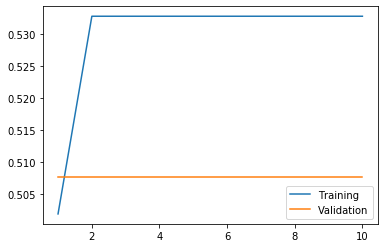

In [157]:
plt.plot(range(1, len(acc)+1), acc, label='Training')
plt.plot(range(1, len(acc)+1), val_acc, label='Validation')
plt.legend()
plt.show()

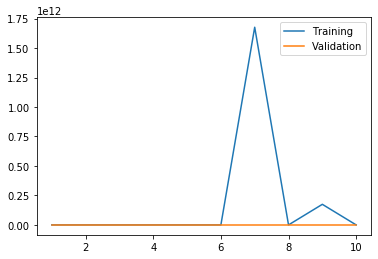

In [158]:
plt.plot(range(1, len(acc)+1), loss, label='Training')
plt.plot(range(1, len(acc)+1), val_loss, label='Validation')
plt.legend()
plt.show()

In [159]:
model_rev.evaluate(test_x1, test_y1)

971/971 [==============================] - 2s 2ms/step


[1.035894248684452, 0.5190525054931641]

### Bidirectional

In [194]:
model_bi = models.Sequential()

In [195]:
model_bi.add(layers.Embedding(max_features, 32, input_length=maxlen))
model_bi.add(layers.Bidirectional(layers.LSTM(32, return_sequences=True)))
model_bi.add(layers.LSTM(64, activation='relu'))
model_bi.add(layers.Dense(32, activation='relu'))
model_bi.add(layers.Dense(3, activation='softmax'))
model_bi.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 300, 32)           320000    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 300, 64)           16640     
_________________________________________________________________
lstm_16 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 99        
Total params: 371,843
Trainable params: 371,843
Non-trainable params: 0
_________________________________________________________________


In [196]:
model_bi.compile(optimizer=optimizers.RMSprop(lr=2e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [197]:
history_bi = model_bi.fit(train_x, train_y, epochs=20, batch_size=32, validation_split=0.2)

Train on 1811 samples, validate on 453 samples
Epoch 1/20
1811/1811 [==============================] - 50s 27ms/step - loss: 1059950003363393.2500 - acc: 0.5279 - val_loss: 1.0385 - val_acc: 0.5077
Epoch 2/20
1811/1811 [==============================] - 48s 26ms/step - loss: 1.0147 - acc: 0.5329 - val_loss: 1.0385 - val_acc: 0.5077
Epoch 3/20
1811/1811 [==============================] - 48s 27ms/step - loss: 1.0122 - acc: 0.5329 - val_loss: 1.0389 - val_acc: 0.5077
Epoch 4/20
1811/1811 [==============================] - 50s 28ms/step - loss: 1.0102 - acc: 0.5329 - val_loss: 1.0392 - val_acc: 0.5077
Epoch 5/20
1811/1811 [==============================] - 49s 27ms/step - loss: 1.0083 - acc: 0.5329 - val_loss: 1.0397 - val_acc: 0.5077
Epoch 6/20
1811/1811 [==============================] - 70s 39ms/step - loss: 1.0063 - acc: 0.5329 - val_loss: 1.0400 - val_acc: 0.5077
Epoch 7/20
1811/1811 [==============================] - 81s 44ms/step - loss: 1.0041 - acc: 0.5329 - val_loss: 1.0407 - va

In [168]:
loss = history_bi.history['loss']
val_loss = history_bi.history['val_loss']

acc = history_bi.history['acc']
val_acc = history_bi.history['val_acc']

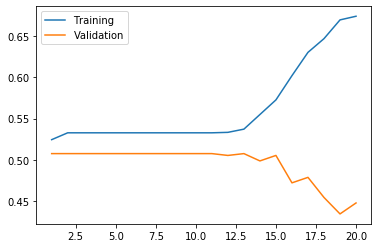

In [169]:
plt.plot(range(1, len(acc)+1), acc, label='Training')
plt.plot(range(1, len(acc)+1), val_acc, label='Validation')
plt.legend()
plt.show()

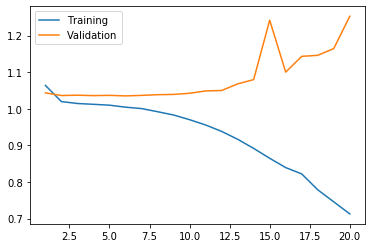

In [170]:
plt.plot(range(1, len(acc)+1), loss, label='Training')
plt.plot(range(1, len(acc)+1), val_loss, label='Validation')
plt.legend()
plt.show()

### Conv1D

In [175]:
model_conv = models.Sequential()

In [176]:
model_conv.add(layers.Embedding(max_features, 128, input_length=maxlen))
model_conv.add(layers.Conv1D(32, 5, activation='relu'))
model_conv.add(layers.MaxPooling1D(5))
model_conv.add(layers.Conv1D(32, 5, activation='relu'))
model_conv.add(layers.GlobalMaxPooling1D())
model_conv.add(layers.Dense(3, activation='softmax'))
model_conv.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 300, 128)          1280000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 296, 32)           20512     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 59, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 55, 32)            5152      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 99        
Total params: 1,305,763
Trainable params: 1,305,763
Non-trainable params: 0
___________________________________________

In [177]:
model_conv.compile(optimizer=optimizers.RMSprop(lr=2e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [178]:
history_conv = model_conv.fit(train_x, train_y, epochs=20, batch_size=32, validation_split=0.2)

Train on 1811 samples, validate on 453 samples
Epoch 1/20
1811/1811 [==============================] - 4s 2ms/step - loss: 1.0527 - acc: 0.5064 - val_loss: 1.0346 - val_acc: 0.5077
Epoch 2/20
1811/1811 [==============================] - 4s 2ms/step - loss: 1.0118 - acc: 0.5329 - val_loss: 1.0348 - val_acc: 0.5077
Epoch 3/20
1811/1811 [==============================] - 3s 2ms/step - loss: 1.0036 - acc: 0.5329 - val_loss: 1.0349 - val_acc: 0.5077
Epoch 4/20
1811/1811 [==============================] - 4s 2ms/step - loss: 0.9957 - acc: 0.5329 - val_loss: 1.0345 - val_acc: 0.5077
Epoch 5/20
1811/1811 [==============================] - 4s 2ms/step - loss: 0.9873 - acc: 0.5329 - val_loss: 1.0359 - val_acc: 0.5077
Epoch 6/20
1811/1811 [==============================] - 4s 2ms/step - loss: 0.9773 - acc: 0.5329 - val_loss: 1.0381 - val_acc: 0.5077
Epoch 7/20
1811/1811 [==============================] - 4s 2ms/step - loss: 0.9662 - acc: 0.5329 - val_loss: 1.0378 - val_acc: 0.5077
Epoch 8/20
1811

In [179]:
loss = history_conv.history['loss']
val_loss = history_conv.history['val_loss']

acc = history_conv.history['acc']
val_acc = history_conv.history['val_acc']

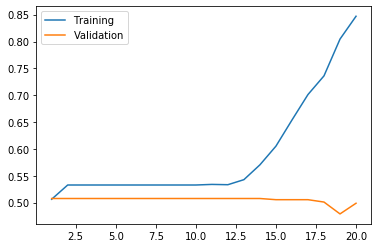

In [180]:
plt.plot(range(1, len(acc)+1), acc, label='Training')
plt.plot(range(1, len(acc)+1), val_acc, label='Validation')
plt.legend()
plt.show()

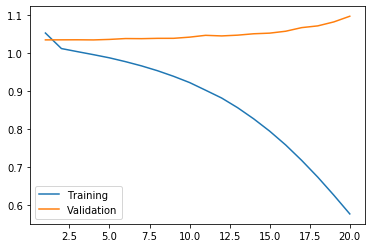

In [181]:
plt.plot(range(1, len(acc)+1), loss, label='Training')
plt.plot(range(1, len(acc)+1), val_loss, label='Validation')
plt.legend()
plt.show()

In [200]:
from sklearn.metrics import SCORERS, make_scorer

In [203]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])